# **Prepare and setup environment**

In [37]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# **Exploratory Data Analysis**

In [2]:
# load dataset
df = pd.read_csv('wdbc.data')
df.columns= ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [4]:
df.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
df=df.drop(columns=['id'])

In [6]:
df.shape

(568, 31)

In [ ]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [8]:
data_orig = df.copy()

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,0.062770,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,0.007035,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,0.057697,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,0.061515,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,0.066120,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
df.isnull().values.any()

False

In [11]:
df['diagnosis'].value_counts(normalize=True)

B    0.628521
M    0.371479
Name: diagnosis, dtype: float64

<Axes: >

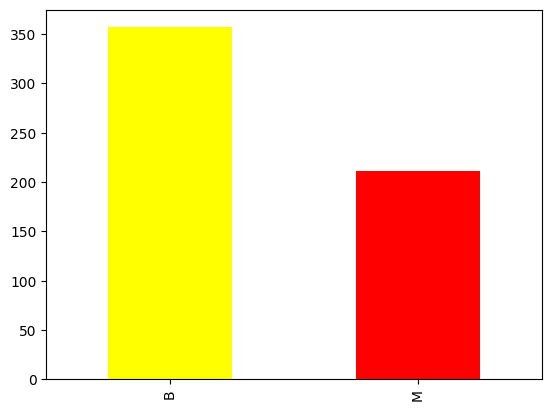

In [12]:
df['diagnosis'].value_counts().plot.bar(color=['yellow', 'red'])

As we can see from the bar chart above, this dataset has two classes: `B` and `M`. The labels are imbalanced.

In [14]:
corr_mat = df.corr()

# Strip the diagonal for future examination
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0

corr_mat

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,0.000000,0.329383,0.997876,0.987344,0.168094,0.505129,0.676557,0.823165,0.144236,-0.317749,...,0.969964,0.300440,0.966231,0.941537,0.117392,0.411329,0.525454,0.744025,0.159877,0.003339
texture_mean,0.329383,0.000000,0.335918,0.326193,-0.017769,0.252038,0.315248,0.305590,0.080146,-0.068771,...,0.361964,0.912020,0.369573,0.353434,0.082714,0.290229,0.311122,0.306278,0.116263,0.127177
perimeter_mean,0.997876,0.335918,0.000000,0.986548,0.204505,0.555676,0.715662,0.851338,0.179100,-0.268103,...,0.969675,0.307013,0.971157,0.941735,0.148059,0.453304,0.562165,0.770783,0.184458,0.046909
area_mean,0.987344,0.326193,0.986548,0.000000,0.174838,0.497981,0.686232,0.824246,0.148219,-0.288560,...,0.963319,0.290565,0.960440,0.959952,0.121543,0.388554,0.511392,0.722009,0.139856,0.000382
smoothness_mean,0.168094,-0.017769,0.204505,0.174838,0.000000,0.657741,0.519002,0.551009,0.555259,0.582435,...,0.209018,0.039977,0.234093,0.202344,0.804667,0.469090,0.431727,0.500119,0.390161,0.496684
compactness_mean,0.505129,0.252038,0.555676,0.497981,0.657741,0.000000,0.881619,0.829050,0.598095,0.560161,...,0.531125,0.258877,0.585188,0.504612,0.564204,0.864097,0.815021,0.813810,0.502439,0.684961
concavity_mean,0.676557,0.315248,0.715662,0.686232,0.519002,0.881619,0.000000,0.920462,0.495525,0.329768,...,0.685826,0.308645,0.726703,0.673187,0.446155,0.751937,0.883184,0.859918,0.401782,0.510736
concave points_mean,0.823165,0.305590,0.851338,0.824246,0.551009,0.829050,0.920462,0.000000,0.457171,0.158464,...,0.829188,0.301004,0.854468,0.808120,0.450145,0.663532,0.750169,0.909272,0.368009,0.363277
symmetry_mean,0.144236,0.080146,0.179100,0.148219,0.555259,0.598095,0.495525,0.457171,0.000000,0.475301,...,0.179703,0.096533,0.212084,0.170721,0.424045,0.467830,0.429023,0.425146,0.696745,0.434165
fractal_dimension_mean,-0.317749,-0.068771,-0.268103,-0.288560,0.582435,0.560161,0.329768,0.158464,0.475301,0.000000,...,-0.263188,-0.046153,-0.216279,-0.241737,0.502760,0.453168,0.340717,0.167737,0.326735,0.765562


In [15]:
corr_mat.abs().idxmax()

radius_mean                         perimeter_mean
texture_mean                         texture_worst
perimeter_mean                         radius_mean
area_mean                              radius_mean
smoothness_mean                   smoothness_worst
compactness_mean                    concavity_mean
concavity_mean                 concave points_mean
concave points_mean                 concavity_mean
symmetry_mean                       symmetry_worst
fractal_dimension_mean     fractal_dimension_worst
radius_se                             perimeter_se
texture_se                             symmetry_se
perimeter_se                             radius_se
area_se                                  radius_se
smoothness_se                 fractal_dimension_se
compactness_se                fractal_dimension_se
concavity_se                        compactness_se
concave points_se                     concavity_se
symmetry_se                          symmetry_mean
fractal_dimension_se           

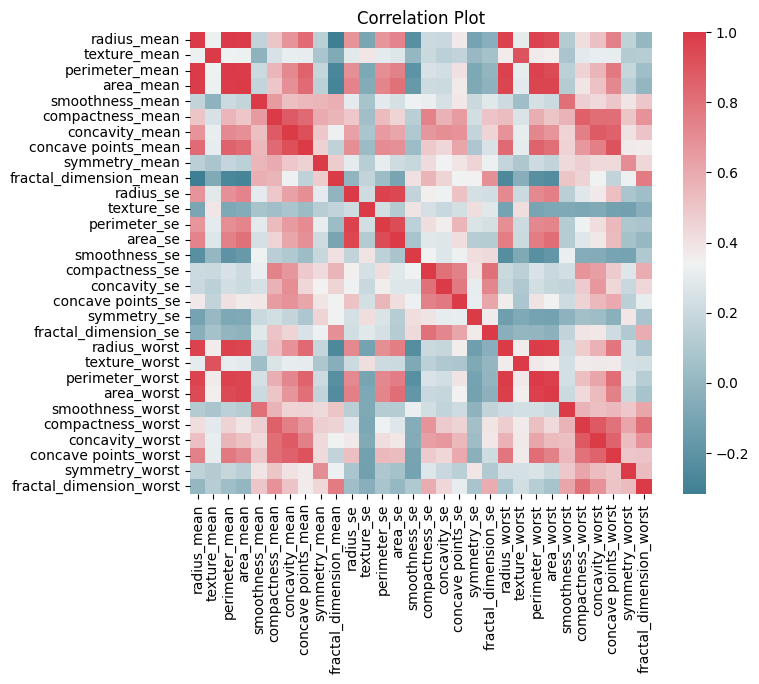

In [13]:
cor= df.corr(method='pearson')
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()


In [26]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.sort_values(ascending=False)
    return au_corr[31:31+n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 30))

Top Absolute Correlations
radius_mean      area_mean          0.999404
area_worst       radius_worst       0.998969
radius_worst     area_worst         0.998969
radius_mean      perimeter_mean     0.998031
perimeter_mean   radius_mean        0.998031
area_mean        perimeter_mean     0.997060
perimeter_mean   area_mean          0.997060
perimeter_worst  radius_worst       0.994512
radius_worst     perimeter_worst    0.994512
perimeter_worst  area_worst         0.993239
area_worst       perimeter_worst    0.993239
area_mean        area_worst         0.979299
area_worst       area_mean          0.979299
radius_worst     perimeter_mean     0.977919
perimeter_mean   radius_worst       0.977919
perimeter_worst  perimeter_mean     0.977850
perimeter_mean   perimeter_worst    0.977850
area_mean        radius_worst       0.977822
radius_worst     area_mean          0.977822
perimeter_mean   area_worst         0.977710
area_worst       perimeter_mean     0.977710
                 radius_mean 

# **Feature Engineering**

In [27]:
X_raw = df.iloc[:, 1:]
y_raw = df.iloc[:, 0]

Fortunately, all feature columns are numeric so we just need to scale them. Here we use the `MinMaxScaler` provided by `sklearn` for scaling.
For the target variable `y`, let's use the `LabelEncoder` provided by `sklearn` to encode its three class values.

In [29]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# The custom NumPy log transformer
log_transformer = FunctionTransformer(np.log1p)
estimators = [('log1p', log_transformer), ('minmaxscale', MinMaxScaler())]

In [30]:
# Scaling the raw input features
pipeline = Pipeline(estimators)
X = pipeline.fit_transform(X_raw)
# X = scaler.fit_transform(X_raw)

In [31]:
print(f"The range of feature inputs are within {X.min()} to {X.max()}")

The range of feature inputs are within 0.0 to 1.0


In [32]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

In [33]:
# Encode the target variable
y = label_encoder.fit_transform(y_raw.values.ravel())

In [34]:
np.unique(y, return_counts=True)

(array([0, 1]), array([357, 211]))

# **Split Data**

First, let's split the training and testing dataset. Training dataset will be used to train and tune models, and testing dataset will be used to evaluate the models. Using stratified split due to imbalance in classes.

In [35]:
# First, let's split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 123)

In [36]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Training dataset shape, X_train: (454, 30), y_train: (454,)
Testing dataset shape, X_test: (114, 30), y_test: (114,)


# **PCA**

In [42]:
pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 31):

    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(X)

    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))

    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n,
                                             'features': df.columns[1:],
                                             'values':abs_feature_values/abs_feature_values.sum()}))

pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.531611
2,PCA(n_components=2),0.698084
3,PCA(n_components=3),0.788164
4,PCA(n_components=4),0.848655
5,PCA(n_components=5),0.888952
6,PCA(n_components=6),0.916739
7,PCA(n_components=7),0.93419
8,PCA(n_components=8),0.946745
9,PCA(n_components=9),0.956739


In [43]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
n,,,,,,,,,,,,,,,,,,,,,
1,0.039818,0.044723,0.045142,0.049961,0.030227,0.048747,0.065852,0.028681,0.068574,0.066312,...,0.047326,0.020408,0.001270,0.022696,0.020175,0.001649,0.019119,0.019767,0.002926,0.022512
2,0.045250,0.037021,0.047655,0.046166,0.039841,0.043801,0.032693,0.025226,0.036506,0.045673,...,0.049027,0.027737,0.017491,0.031418,0.028416,0.016579,0.022822,0.014185,0.012314,0.014287
3,0.034343,0.045004,0.036627,0.035289,0.035818,0.045437,0.022820,0.027187,0.038608,0.031996,...,0.037739,0.021480,0.027316,0.032936,0.022290,0.029636,0.026758,0.026860,0.046735,0.023170
4,0.028965,0.043887,0.029090,0.030496,0.032087,0.044114,0.024132,0.030616,0.032823,0.027839,...,0.029847,0.022635,0.027870,0.030534,0.021377,0.032133,0.027366,0.050272,0.050780,0.055477
5,0.025008,0.041474,0.025277,0.025178,0.043440,0.040886,0.023605,0.034687,0.028041,0.029217,...,0.026358,0.035205,0.026444,0.045047,0.032880,0.030854,0.037803,0.042337,0.042446,0.047697
6,0.022900,0.036886,0.022566,0.022694,0.042170,0.038420,0.025129,0.032021,0.027170,0.026816,...,0.023617,0.041297,0.033162,0.054192,0.045037,0.045259,0.054219,0.037294,0.039904,0.041900
7,0.022666,0.040487,0.020606,0.020727,0.037261,0.039883,0.029054,0.036003,0.028588,0.029239,...,0.021621,0.039782,0.033810,0.047664,0.041665,0.045245,0.045977,0.033966,0.044397,0.036047
8,0.025458,0.038059,0.020332,0.026120,0.034215,0.034864,0.027774,0.034820,0.029928,0.028154,...,0.021463,0.039979,0.035189,0.046925,0.038089,0.038989,0.043887,0.030202,0.046185,0.031945
9,0.026238,0.034521,0.020197,0.024145,0.037197,0.033290,0.028279,0.031471,0.030272,0.029494,...,0.021373,0.035579,0.044878,0.048439,0.040344,0.044366,0.040931,0.033238,0.049565,0.028805


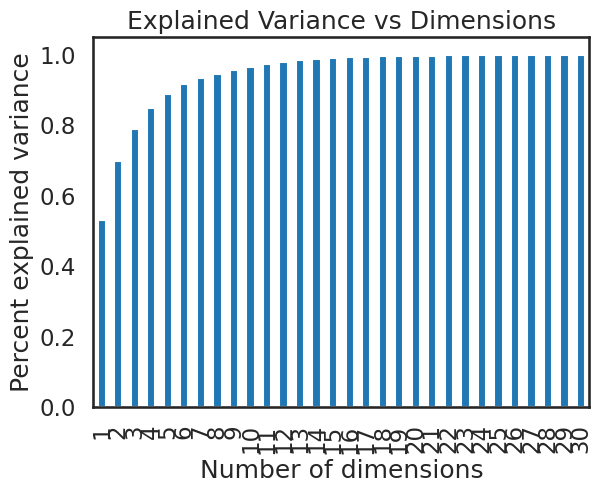

In [44]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

In [50]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Custom scorer--use negative rmse of inverse transform
def scorer(pcamodel, X, y=None):

    try:
        X_val = X.values
    except:
        X_val = X

    # Calculate and inverse transform the data
    data_inv = pcamodel.fit(X_val).transform(X_val)
    data_inv = pcamodel.inverse_transform(data_inv)

    # The error calculation
    mse = mean_squared_error(data_inv.ravel(), X_val.ravel())

    # Larger values are better for scorers, so take negative value
    return -1.0 * mse

# The grid search parameters
param_grid = {'gamma':[0.001, 0.01, 0.05, 0.1, 0.5, 1.0],
              'n_components': [5, 10, 15, 20, 25, 30]}

# The grid search
kernelPCA = GridSearchCV(KernelPCA(kernel='rbf', fit_inverse_transform=True),
                         param_grid=param_grid,
                         scoring=scorer,
                         n_jobs=-1, error_score='raise')


kernelPCA = kernelPCA.fit(X)

kernelPCA.best_estimator_

KernelPCA(fit_inverse_transform=True, gamma=1.0, kernel='rbf', n_components=20)

In [54]:
pca = KernelPCA(fit_inverse_transform=True, gamma=1.0, kernel='rbf', n_components=20)
pca.fit(X_train)

x_train_pca = pca.transform(X_train)
test_pca = pca.transform(X_test)

# **Hyper-parameter Tuning**

In [55]:
models = [
          LogisticRegression(),
          RandomForestClassifier(random_state=42),
          SVC(),
          KNeighborsClassifier(),
          GaussianNB(),
          DecisionTreeClassifier(),
          SGDClassifier()
          ]
params = [
          {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]},
          { 'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' :['gini', 'entropy']},
          {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
          {'n_neighbors': range(1,15), 'weights': ['uniform', 'distance'], 'n_jobs':[-1]},
          {'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]},
          {'max_features': ['auto', 'sqrt', 'log2'], 'ccp_alpha': [0.1, .01, .001], 'max_depth' : [5, 6, 7, 8, 9], 'criterion' :['gini', 'entropy']},
          {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 'loss': ['log'], 'penalty': ['l2'], 'n_jobs': [-1]}
          ]
cv_models=[]
best_params=[]
accuracies=[]
for model, param in zip(models, params):
    cv = GridSearchCV(model, param, cv=10)
    cv_models.append(cv)
    cv.fit(x_train_pca, y_train)
    best_params.append(cv.best_params_)
    accuracies.append(cv.best_score_)

In [56]:
for model,best_param,accuracy in zip(models,best_params,accuracies):
  print("model name: ",model)
  print("best parameters are: ", best_param)
  print("accuracy: ", accuracy)

model name:  LogisticRegression()
best parameters are:  {'C': 10.0, 'penalty': 'l2'}
accuracy:  0.9756521739130435
model name:  RandomForestClassifier(random_state=42)
best parameters are:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
accuracy:  0.9602415458937198
model name:  SVC()
best parameters are:  {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy:  0.980144927536232
model name:  KNeighborsClassifier()
best parameters are:  {'n_jobs': -1, 'n_neighbors': 12, 'weights': 'distance'}
accuracy:  0.9669565217391305
model name:  GaussianNB()
best parameters are:  {'var_smoothing': 0.01}
accuracy:  0.9404347826086956
model name:  DecisionTreeClassifier()
best parameters are:  {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto'}
accuracy:  0.9404830917874396
model name:  SGDClassifier()
best parameters are:  {'alpha': 0.001, 'loss': 'log', 'n_jobs': -1, 'penalty': 'l2'}
accuracy:  0.9735265700483092


# **Model Training**

We observe that SVC() with best parameters as:  {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'} provides highest accuracy= 980144927536232

In [58]:
model = SVC(C=1000, gamma= 0.1, kernel= 'rbf')

In [60]:
model.fit(x_train_pca, y_train)
y_predict = model.predict(test_pca)

In [62]:
r2_score(y_test, y_predict)

0.8492063492063492

# **Results**

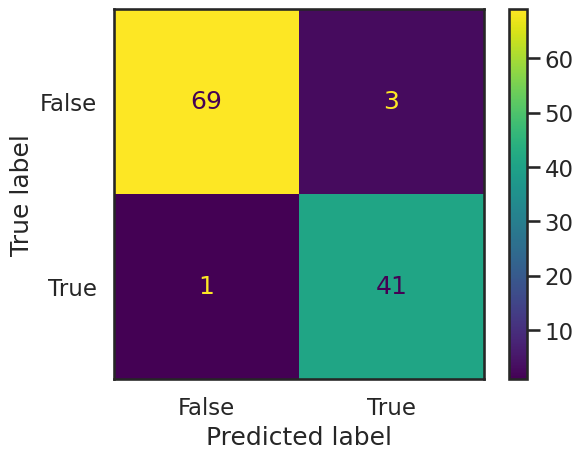

In [64]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [66]:
Accuracy = metrics.accuracy_score(y_test, y_predict)
Precision = metrics.precision_score(y_test, y_predict)
Sensitivity_recall = metrics.recall_score(y_test, y_predict)
Specificity = metrics.recall_score(y_test, y_predict, pos_label=0)
F1_score = metrics.f1_score(y_test, y_predict)
results= {"Accuracy":Accuracy, "Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score}
for i,j in zip(results.keys(),results.values()):
  print(i,j)

Accuracy 0.9649122807017544
Precision 0.9318181818181818
Sensitivity_recall 0.9761904761904762
Specificity 0.9583333333333334
F1_score 0.9534883720930233
